In this lab, we'll be looking at how to turn a text into numbers. A numeric representation like this is called a *vector*. And so the process of turning language into numbers is called vectorizing. We'll start, as always, by loading our environment.

In [1]:
from text_analytics import TextAnalytics
import os
import pandas as pd

ai = TextAnalytics()
ai.data_dir = os.path.join(".", "data")
print("Done!")

Done!


We'll work with a digital corpora this time, from tweets that represent different cities around the world. Each row is a sample that is an aggregation of many different tweets from a single point in time.

In [2]:
file = "sociolinguistics.english_cities.gz"
file = os.path.join(ai.data_dir, file)
df = pd.read_csv(file, nrows = 10000)
print(df)
print("\nDone!")

             City                                               Text
0      washington   you really need to go back to bar tending or ...
1          london   jay finley christ in explains why today is co...
2           lagos   forget if this happened truly it s definitely...
3         toronto   yall i love this skin big thanks to for makin...
4         nairobi   the late brilliant prof ali mazrui explains h...
...           ...                                                ...
9995       dallas   seriously god is peripheral god is nice or ma...
9996  los_angeles   good morning watching workouts who shall be m...
9997       mumbai   you need to provide everything online on site...
9998      toronto   we re hiring the centre is looking for highly...
9999      kolkata   ingersoll rand is hiring for engineer i banga...

[10000 rows x 2 columns]

Done!


So, here we are going to run some code to turn this into a vector of word frequencies. We're using *scikit-learn* to do this analysis.

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(input = "content", analyzer = "word")

print("Done!")

Done!


Now, we'll go ahead and use it.

In [4]:
line = ai.print_sample(df)
vector = vectorizer.fit_transform([line])
print(vector)
print("Done!")

  (0, 18)	1
  (0, 124)	1
  (0, 462)	1
  (0, 63)	1
  (0, 314)	1
  (0, 425)	1
  (0, 226)	1
  (0, 163)	1
  (0, 427)	2
  (0, 26)	1
  (0, 221)	11
  (0, 225)	3
  (0, 484)	19
  (0, 337)	1
  (0, 471)	2
  (0, 335)	1
  (0, 8)	1
  (0, 234)	6
  (0, 358)	1
  (0, 299)	1
  (0, 72)	6
  (0, 177)	1
  (0, 185)	1
  (0, 148)	1
  (0, 143)	1
  :	:
  (0, 466)	1
  (0, 520)	1
  (0, 319)	1
  (0, 500)	1
  (0, 489)	1
  (0, 146)	1
  (0, 155)	1
  (0, 301)	1
  (0, 245)	1
  (0, 365)	1
  (0, 243)	1
  (0, 534)	1
  (0, 438)	1
  (0, 294)	1
  (0, 77)	1
  (0, 505)	1
  (0, 356)	1
  (0, 385)	1
  (0, 552)	1
  (0, 137)	1
  (0, 308)	1
  (0, 384)	1
  (0, 27)	1
  (0, 232)	1
  (0, 22)	1
Done!


So, the first thing we've displayed is the string. And the second thing we've displayed is the vectorized or numeric version of that string.

This is currently in a *sparse* format, so that not every element has to be displayed. A sparse vector is useful because a lot of values will be 0. We'll show the full version, by converting this into a dense vector.

In [5]:
line = ai.print_sample(df)
vector = vectorizer.fit_transform([line]).todense()
print(vector)
print("Done!")

[[ 1  1  1  2  1  1  1  1  1  1  2  1  1  3  1  1  5  6  1 10  1  1  1  1
   1  1  5  1  1  2  1  3  1  7  1  1  1  1  1  1  1  3  1 10  1  1  2  1
   2  1  1  3  1  2  1  1  1  2  1  1  4  1  1  1  1  2  1  5  1  4  1  1
   1  1  1  1  1  1  1  1  1  1  3  1  1  1  3  1  1  1  1  1  1  1  1  1
   1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  1  1  1  1  1
   1  1  1  1  2  1  2  1  1  1  1  1  1  1  3  1  1  1  1  1  1  1  1  1
   1  2  1  1  2  1  1  1  1  1  1  1  1  1  2  1  1  1  1  3  1 11  1  1
   1  1  1  3  1  1  1  1  1  1  1  1  1  1  1  1  1  2  6  1  1  1  1  1
   1  1  1  1  5  5  1  1  1  3  3  1  1  1  1  1  1  1  1  1  1  1  2  1
   1  1  1  1  6  2 16  2  1  1  1  1  2  1  1 17  1 16  4  1  1  1  3  3
   1  1  1  1  1  6  1  1  1  1  1  1  1  1  1  5  1  1  1  1  1  1  1  1
   1  2  2  3  1  2  5  1  1  1  2  1  1  1  2  1  1  1  3  2  1  1  1  1
   1  1  1  1  1  1  1  1  1  1  1  1  1  4  3  2  1  2  1  1  3  4  1  1
   1  1  1  2  1  1  1  1  1  1  1  1 

Let's finish up by making this into a nice dataframe.

In [6]:
line = ai.print_sample(df)
vector = vectorizer.fit_transform([line])
vector = ai.print_vector(vector, vectorizer)
print(vector)
print("Done!")

             0
abandoned    1
abbey        1
about        5
absolutely   1
acceptance   1
...         ..
year         1
yet          1
you         10
your         3
yourselves   1

[575 rows x 1 columns]
Done!


This process transforms each sentence in a list of numbers. Only one sample is represented at a time, which means that this vector isn't useful for making comparisons. And we haven't chosen how to represent the linguistic signal with much precision. This is just a first look at how to vectorize our texts.

Let's change gears and take a look at word frequencies. What happens if we count all the words? Here we will load the pre-computed frequencies for the entire *NYT* corpus.

In [7]:
file = "economic.nyt.1931-2016.gz.freq.gz"
file = os.path.join(ai.data_dir, file)
freq_df = pd.read_csv(file, index_col = 0)
print(freq_df)

print(freq_df.loc[:,"Freq"].sum())

                     Freq
the              23600413
of               13228324
a                 9252017
and               8944509
to                8118755
...                   ...
morespecific            1
carolinareturns         1
sumbono                 1
rhombuses               1
fathersons              1

[1452616 rows x 1 columns]
364554840


In [8]:
file = "economic.congress.1931-2016.gz.freq.gz"
file = os.path.join(ai.data_dir, file)
freq_df2 = pd.read_csv(file, index_col = 0)
freq_df2.columns = ["Freq"]
print(freq_df2)

print(freq_df2.loc[:,"Freq"].sum())

                  Freq
the           62430126
of            31703209
to            27865993
and           21293643
in            18100620
...                ...
frfrench             1
iajapanese           1
ukunited             1
pnpanamantan         1
desron               1

[1836019 rows x 1 columns]
842553927


So here we have a total of 1,452,132 word types. And 364,554,943 word tokens. This is informal digital data. What about congressional texts? We also load the word frequencies for congressional data. Here there is much more data (842 million words), but only 1,832,931 word types. That is type/token ratios of 0.0039 (NYT) and 0.0021 (Congress). The speech data is more formulaic, with less new vocabulary.

But what does the distribution of word frequencies look like? Let's make a graph that shows the number of words at each frequency. Because frequency drops off so quickly, we have to use log scale.

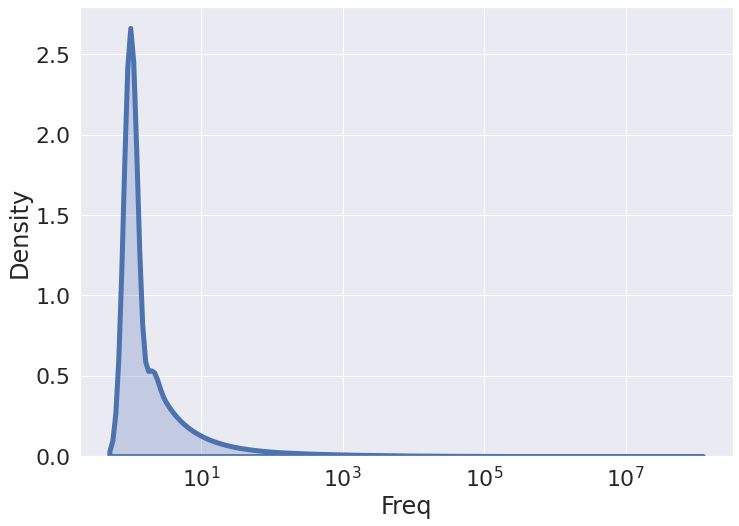

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

sns.set(font_scale = 2)
sns.kdeplot(data = freq_df2, x = "Freq", fill = True, log_scale = True, linewidth = 5, 
            bw_method = "scott", bw_adjust = 3)

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

This shows us that most words have a low frequency, with few high frequency words (the long tail as the figure goes to the right).